In [1]:
import sys
sys.path.append('../../../30_data_tools/')

In [2]:
from blow_up import blow_up, interpolate_radius, blow_up_region, contract_region
from pathlib import Path
import numpy as np
from PIL import Image
import plotly.express as px
import math
from scipy.special import expit as logistic

In [3]:
from helper import load_dotenv

In [4]:
dotenv = load_dotenv()

In [6]:
pattern_paths = list(dotenv['PATTERN_DIR'].glob('./*.tif'))

In [8]:
orig_img = Image.open(pattern_paths[0])

orig_img = orig_img.convert('L').resize((
    int(orig_img.size[0] * (600 / 2400)),int(orig_img.size[1] * (600 / 2400))
))

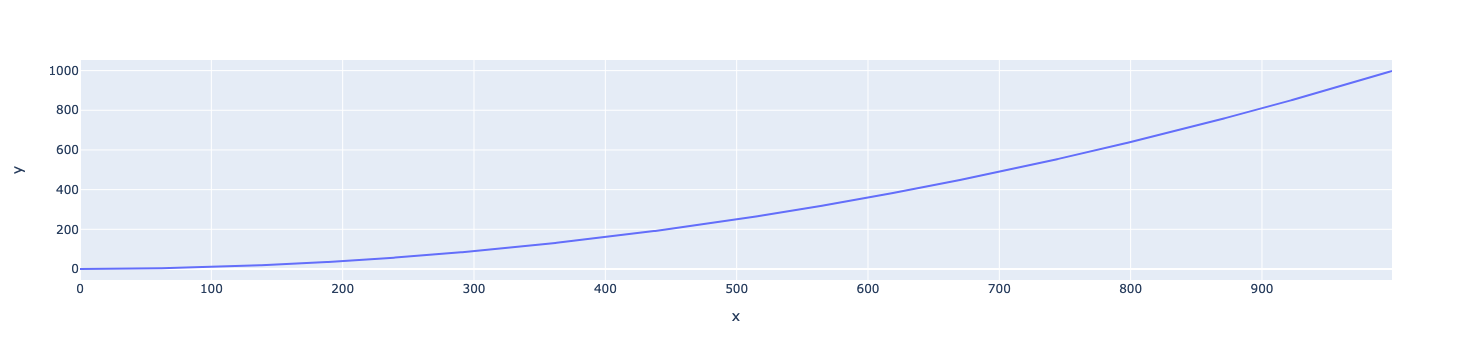

In [9]:
def interpolate_radius_test( r, radius, c, is_blow_up=True ):
    return r ** 2 / radius ** 2 * radius


px.line(
    y=[interpolate_radius_test(r,1000,10) for r in range(1000)]
)

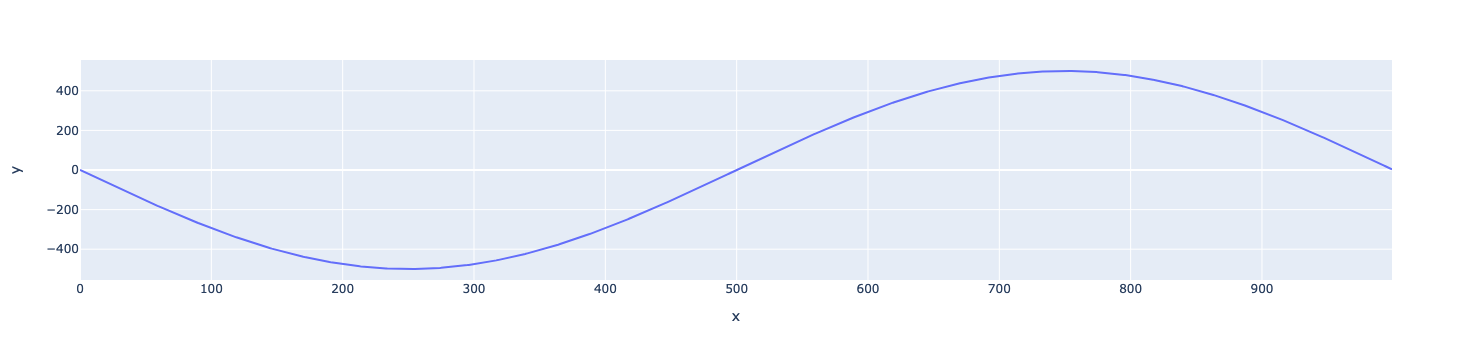

In [10]:
def interpolate_radius_test( r, radius, c, is_blow_up=True ):
    factor = ((math.sin(2 * math.pi * r / radius))) * 0.5

    return r + factor * radius

px.line(
    y=[r - interpolate_radius_test(r,1000,10) for r in range(1000)]
)

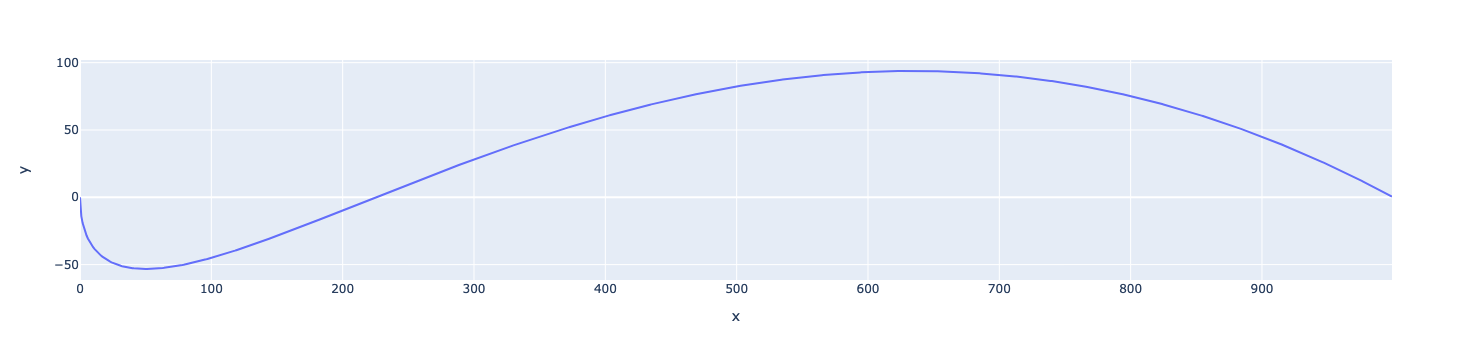

In [11]:
px.line(
    y=[r-interpolate_radius(r,1000,15) for r in range(1000)]
)

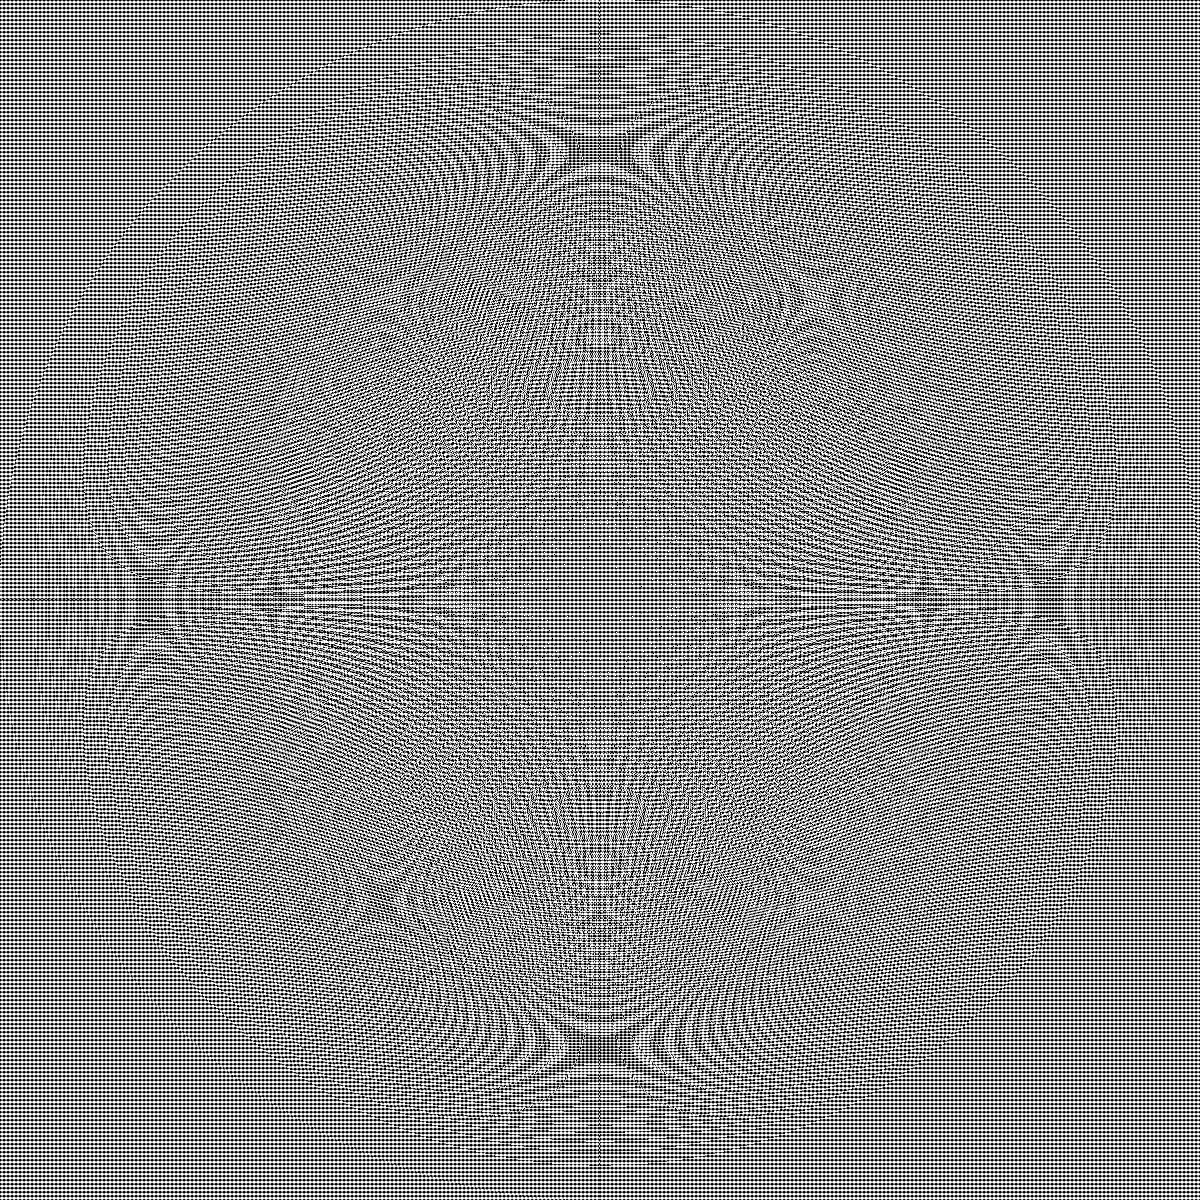

In [16]:
blow_up(orig_img, 25)

In [ ]:
orig_img.size

In [ ]:
import random

In [ ]:
img = blow_up(orig_img, 8)

for i in range(8):
    r = 25 + random.randrange(200)
    center = (
        random.randrange( img.size[0] - r * 2 ),
        random.randrange( img.size[0] - r * 2 )
    )
    img = blow_up_region( img, r, center, random.random() )

for i in range(8):
    r = 25 + random.randrange(200)
    center = (
        random.randrange( img.size[0] - r * 2 ),
        random.randrange( img.size[0] - r * 2 )
    )
    img = contract_region( img, r, center, random.random() )

In [ ]:
np.array(img).min()

In [ ]:
img